In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)
# import cufflinks as cf

import missingno as msno
import pandas_profiling
import math


from sklearn.datasets import make_blobs
import time

In [3]:
# read the raw_new_Country data created on notebook 1 ***
c_table=pd.read_csv("../input/fifa-17-dataset/raw_new_Country.csv")

In [4]:
# set nationality and name as index ***
c_table.set_index(['Nationality', 'Name'])


Club Club_Joining  \
Nationality Name                                                
Afghanistan Maziar Kouhyar               Walsall    2/16/2016   
            Noor Husin                Accrington     8/1/2016   
Albania     Agim Zeka                 LOSC Lille    1/31/2017   
            Agon Mehmeti          Gençlerbirliği    1/20/2017   
            Albion Avdijaj              FC Vaduz    9/25/2015   
            Alfred Ajdarević           Örebro SK     7/5/2016   
            Amir Abrashi             SC Freiburg     7/1/2015   
            Arlind Ajeti                  Torino     7/7/2016   
            Armando Sadiku             FC Lugano     1/1/2014   
            Armando Vajushi             Vercelli    7/20/2016   
            Bekim Balaj             Terek Grozny     6/9/2016   
            Berat Djimsiti              Avellino    1/18/2016   
            Bradhec Bytyqi            Aalborg BK     7/1/2016   
            Edgar Çani                      Pisa    6/13/2016   
            Egli Kaja              AFC Wimbledon    4/17/2015   
            Elseid Hysaj                  Napoli     8/2/2015   
            Emanuele Ndoj                Brescia    1/31/2016   
            Entonjo Elezaj               Perugia     7/1/2016   
            Ergys Kace                      PAOK     1/1/2011   
            Ermir Lenjani          Stade Rennais     1/7/2015   
            Etrit Berisha               Atalanta     9/2/2013   
            Flo Bojaj             Newport County    4/16/2014   
            Frédéric Veseli               Empoli    8/18/2016   
            Jahmir Hyka           SJ Earthquakes     2/3/2017   
            Jürgen Gjasula        Greuther Fürth     7/1/2015   
            Keidi Bare           Atlético Madrid     7/1/2016   
            Ledian Memushaj              Pescara     8/3/2015   
            Leonardo Maloku              Pescara     7/1/2015   
            Migjen Basha                    Bari    8/12/2016   
            Mërgim Mavraj           Hamburger SV     1/1/2017   
...                                          ...          ...   
Wales       Sam Jones               Grimsby Town    1/31/2017   
            Sam Vokes                    Burnley    7/31/2012   
            Shaun MacDonald       Wigan Athletic    8/13/2016   
            Simon Church                 Roda JC    8/24/2016   
            Steve Morison               Millwall     8/4/2015   
            Tom Bradshaw                Barnsley    7/14/2016   
            Tom James                Yeovil Town    1/13/2017   
            Tom Lawrence                 Ipswich     9/2/2014   
            Tom Lockyer           Bristol Rovers     7/1/2011   
            Tom Owen-Evans        Newport County    9/15/2014   
            Tommy O'Sullivan          Colchester    1/20/2017   
            Troy Brown               Exeter City     7/3/2015   
            Tyler Roberts             Shrewsbury    5/24/2015   
            Wayne Hennessey       Crystal Palace    1/31/2014   
            Wes Burns             Fleetwood Town    1/19/2017   
            Will Aimson                Blackpool    1/14/2016   
Zambia      Chisamba Lungu               FC Ural     8/1/2010   
            Evans Kangwa           Gaziantepspor    7/29/2016   
            Lewis Macha            Kaizer Chiefs     7/1/2016   
            Stoppila Sunzu          Arsenal Tula     7/9/2016   
Zimbabwe    Edmore Chirambadare    Kaizer Chiefs    6/27/2016   
            Knowledge Musona         KV Oostende     1/1/2015   
            Macauley Bonne            Colchester    12/1/2012   
            Marvelous Nakamba            Vitesse    8/13/2014   
            Matthew Rusike       Helsingborgs IF    1/19/2016   
            Michelle Katsvairo     Kaizer Chiefs     7/1/2016   
            Silas Songani            SønderjyskE    1/19/2014   
            Tendai Ndoro         Orlando Pirates     7/1/2015   
            Tinotenda Kadewere    Djurgårdens IF     1/7/2016   
            Wi

In [6]:
len(c_table['Name'])

17441

In [7]:
# form a dataframe that consist of nationality and age_group as columns***
full_table = c_table[['Nationality', 'Age_Group']]
full_table.tail()

,Nationality,Age_Group
17436,Zimbabwe,Normal
17437,Zimbabwe,Normal
17438,Zimbabwe,Normal
17439,Zimbabwe,Youngster
17440,Zimbabwe,Old


In [8]:
len(full_table['Nationality'])

17441

In [9]:
# len(u_table['Nationality'])

In [10]:
pd.set_option('display.max_row', 500)

In [11]:
# Count each Age_group for each country***
# good for grouping
d_table=full_table['Age_Group'].groupby(full_table['Nationality']).value_counts()
u_table = pd.DataFrame(d_table)

u_table

Age_Group
Nationality           Age_Group           
Afghanistan           Youngster          2
Albania               Normal            18
                      Youngster         18
                      Old                1
Algeria               Normal            24
                      Youngster         14
                      Old               12
Angola                Normal             5
                      Youngster          4
                      Old                2
Antigua & Barbuda     Normal             3
                      Youngster          1
Argentina             Youngster        446
                      Normal           416
                      Old              228
Armenia               Normal             6
                      Youngster          2
Aruba                 Normal             1
Australia             Youngster        134
                      Normal            69
                      Old               31
Austria               Youngster        129
                      Normal           111
                      Old               26
Azerbaijan            Youngster          4
                      Normal             3
                      Old                1
Barbados              Normal             1
Belarus               Normal            13
                      Old                3
Belgium               Youngster        151
                      Normal            89
                      Old               25
Belize                Youngster          1
Benin                 Normal             6
                      Youngster          6
                      Old                4
Bermuda               Youngster          4
                      Normal             2
Bolivia               Normal            13
                      Old                9
                      Youngster          8
Bosnia Herzegovina    Normal            25
                      Youngster         18
                      Old                9
Brazil                Normal           510
                      Old              224
                      Youngster        141
Bulgaria              Normal            20
                      Youngster          8
                      Old                7
Burkina Faso          Normal            10
                      Youngster          4
Cameroon              Normal            40
                      Youngster         39
                      Old               17
Canada                Youngster         34
                      Normal            18
                      Old                7
Cape Verde            Normal            16
                      Youngster          4
                      Old                2
Central African Rep.  Normal             3
                      Youngster          2
                      Old                1
Chad                  Youngster          1
Chile                 Youngster        207
                      Normal           121
                      Old               68
China PR              Normal            20
                      Youngster          9
                      Old                1
Chinese Taipei        Old                1
Colombia              Youngster        299
                      Normal           207
                      Old               79
Comoros               Normal             6
                      Youngster          2
                      Old                1
Congo                 Normal            10
                      Youngster          6
                      Old                2
Costa Rica            Normal            16
                      Youngster         10
                      Old                4
Croatia               Youngster         54
                      Normal            52
                      Old               10
Cuba                  Old                1
                      Youngster          1
Curacao               Normal             8
                      Youngster   

In [27]:
u_table = u_table.rename(columns={'Age_Group':'Age_Group_Count'})


Age_Group_Count
Nationality           Age_Group                 
Afghanistan           Youngster                2
Albania               Normal                  18
                      Youngster               18
                      Old                      1
Algeria               Normal                  24
                      Youngster               14
                      Old                     12
Angola                Normal                   5
                      Youngster                4
                      Old                      2
Antigua & Barbuda     Normal                   3
                      Youngster                1
Argentina             Youngster              446
                      Normal                 416
                      Old                    228
Armenia               Normal                   6
                      Youngster                2
Aruba                 Normal                   1
Australia             Youngster              134
                      Normal                  69
                      Old                     31
Austria               Youngster              129
                      Normal                 111
                      Old                     26
Azerbaijan            Youngster                4
                      Normal                   3
                      Old                      1
Barbados              Normal                   1
Belarus               Normal                  13
                      Old                      3
Belgium               Youngster              151
                      Normal                  89
                      Old                     25
Belize                Youngster                1
Benin                 Normal                   6
                      Youngster                6
                      Old                      4
Bermuda               Youngster                4
                      Normal                   2
Bolivia               Normal                  13
                      Old                      9
                      Youngster                8
Bosnia Herzegovina    Normal                  25
                      Youngster               18
                      Old                      9
Brazil                Normal                 510
                      Old                    224
                      Youngster              141
Bulgaria              Normal                  20
                      Youngster                8
                      Old                      7
Burkina Faso          Normal                  10
                      Youngster                4
Cameroon              Normal                  40
                      Youngster               39
                      Old                     17
Canada                Youngster               34
                      Normal                  18
                      Old                      7
Cape Verde            Normal                  16
                      Youngster                4
                      Old                      2
Central African Rep.  Normal                   3
                      Youngster                2
                      Old                      1
Chad                  Youngster                1
Chile                 Youngster              207
                      Normal                 121
                      Old                     68
China PR              Normal                  20
                      Youngster                9
                      Old                      1
Chinese Taipei        Old                      1
Colombia              Youngster              299
                      Normal                 207
                      Old                     79
Comoros               Normal                   6
                      Youngster                2
                      Old                      1
Congo                 Normal                  10
               

In [12]:
# good for grouping
# cc=y['Age_Group'].groupby(y['Nationality']).value_counts()
# yy = pd.DataFrame(cc)

# yy.head()

In [13]:
# pp

In [30]:
f=u_table.reset_index()
f

,Nationality,Age_Group,Age_Group_Count
0,Afghanistan,Youngster,2
1,Albania,Normal,18
2,Albania,Youngster,18
3,Albania,Old,1
4,Algeria,Normal,24
5,Algeria,Youngster,14
6,Algeria,Old,12
7,Angola,Normal,5
8,Angola,Youngster,4
9,Angola,Old,2


In [31]:
sd=f[f["Age_Group"] == 'Youngster']
sd=sd.rename(columns={'Age_Group_Count':'Youngster'})
sd

,Nationality,Age_Group,Youngster
0,Afghanistan,Youngster,2
2,Albania,Youngster,18
5,Algeria,Youngster,14
8,Angola,Youngster,4
11,Antigua & Barbuda,Youngster,1
12,Argentina,Youngster,446
16,Armenia,Youngster,2
18,Australia,Youngster,134
21,Austria,Youngster,129
24,Azerbaijan,Youngster,4


In [36]:
# sdd=r_table[r_table["Age_Group"] == 'Youngster']
# sdd=sdd.rename(columns={'Age_Group.1':'Youngster'})
# sdd

In [32]:
od=f[f["Age_Group"] == 'Old']
od=od.rename(columns={'Age_Group_Count':'Old'})

od

,Nationality,Age_Group,Old
3,Albania,Old,1
6,Algeria,Old,12
9,Angola,Old,2
14,Argentina,Old,228
20,Australia,Old,31
23,Austria,Old,26
26,Azerbaijan,Old,1
29,Belarus,Old,3
32,Belgium,Old,25
36,Benin,Old,4


In [33]:
# odd=r_table[r_table["Age_Group"] == 'Old']
# odd=odd.rename(columns={'Age_Group.1':'Old'})
# odd

In [34]:
nd=f[f["Age_Group"] == 'Normal']
nd=nd.rename(columns={'Age_Group_Count':'Normal'})
nd

,Nationality,Age_Group,Normal
1,Albania,Normal,18
4,Algeria,Normal,24
7,Angola,Normal,5
10,Antigua & Barbuda,Normal,3
13,Argentina,Normal,416
15,Armenia,Normal,6
17,Aruba,Normal,1
19,Australia,Normal,69
22,Austria,Normal,111
25,Azerbaijan,Normal,3


In [35]:
# ndd=r_table[r_table["Age_Group"] == 'Normal']
# ndd=ndd.rename(columns={'Age_Group.1':'Normal'})
# ndd

In [37]:
# merging the tables
my_table= pd.merge(f, sd, on= ['Nationality', 'Age_Group'], how='outer')
my_table= pd.merge(my_table, nd, on= ['Nationality', 'Age_Group'], how='outer')
my_table= pd.merge(my_table, od, on= ['Nationality', 'Age_Group'], how='outer')
my_table

,Nationality,Age_Group,Age_Group_Count,Youngster,Normal,Old
0,Afghanistan,Youngster,2,2.0,NaN,NaN
1,Albania,Normal,18,NaN,18.0,NaN
2,Albania,Youngster,18,18.0,NaN,NaN
3,Albania,Old,1,NaN,NaN,1.0
4,Algeria,Normal,24,NaN,24.0,NaN
5,Algeria,Youngster,14,14.0,NaN,NaN
6,Algeria,Old,12,NaN,NaN,12.0
7,Angola,Normal,5,NaN,5.0,NaN
8,Angola,Youngster,4,4.0,NaN,NaN
9,Angola,Old,2,NaN,NaN,2.0


In [38]:
# # myAgeGroupedTable = pd.merge(myAgeGroupedTable, odd, on= ['Nationality', 'Age_Group'], how='outer')
# myAgeGroupedTable

In [ ]:
# ur_table = my_table.copy()
# ur_table.columns

In [39]:
g = [ 'Age_Group_Count', 'Normal', 'Old','Youngster']
ur_table=my_table.groupby(['Nationality']).agg({col:'max' for col in g})
ur_table


,Age_Group_Count,Normal,Old,Youngster
Nationality,,,,
Afghanistan,2,NaN,NaN,2.0
Albania,18,18.0,1.0,18.0
Algeria,24,24.0,12.0,14.0
Angola,5,5.0,2.0,4.0
Antigua & Barbuda,3,3.0,NaN,1.0
Argentina,446,416.0,228.0,446.0
Armenia,6,6.0,NaN,2.0
Aruba,1,1.0,NaN,NaN
Australia,134,69.0,31.0,134.0


In [40]:
def save_subgroup(dataframe, g_index, subgroup_name, prefix='raw_'):
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv"])
    dataframe.to_csv(save_subgroup_filename, encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, index_col=g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [41]:
save_subgroup(ur_table,'Nationality', 'country_ageGroupCount_table')

Test-passed: we recover the equivalent subgroup dataframe.


In [42]:
# save_subgroup(myAgeGroupedTable, 'Nationality', 'myAgeGroupedTable')

In [36]:
# save_subgroup(ur_table,'Nationality', 'ur_table')

In [15]:
# ur_table=pd.read_csv("C:/Users/Ogooluwa/Desktop/fifa 18 demo players stat/raw_ur_table.csv")

In [75]:
# w_table=pd.read_csv("C:/Users/Ogooluwa/Desktop/fifa 18 demo players stat/raw_myAgeGroupedTable.csv")

In [34]:
# r_table = pd.read_csv("C:/Users/Ogooluwa/Desktop/fifa 18 demo players stat/raw_country_ageGroupCount_table.csv")

In [46]:
ur_table=ur_table.reset_index()

In [47]:
ur_table

,Nationality,Age_Group_Count,Normal,Old,Youngster
0,Afghanistan,2,NaN,NaN,2.0
1,Albania,18,18.0,1.0,18.0
2,Algeria,24,24.0,12.0,14.0
3,Angola,5,5.0,2.0,4.0
4,Antigua & Barbuda,3,3.0,NaN,1.0
5,Argentina,446,416.0,228.0,446.0
6,Armenia,6,6.0,NaN,2.0
7,Aruba,1,1.0,NaN,NaN
8,Australia,134,69.0,31.0,134.0
9,Austria,129,111.0,26.0,129.0


In [49]:
# # r_table
# # w_table=w_table.drop('Unnamed: 0', axis=1)
# w_table

In [48]:

len(ur_table['Nationality'].unique())

160

In [50]:
# g =['Youngster', 'Normal','Old']
# # table = ur_table.drop(['Age_Group', 'Age_Group.1'], axis=1).groupby('Nationality').agg({col:'max' for col in g})
# len(table)

In [102]:
# save_subgroup(table,'Nationality','countryGroupedByAgeGroup')

Test-passed: we recover the equivalent subgroup dataframe.


In [51]:
g =['Youngster', 'Normal','Old']
ur_table = ur_table.drop('Age_Group_Count', axis=1).groupby('Nationality').agg({col:'max' for col in g})
ur_table

,Youngster,Normal,Old
Nationality,,,
Afghanistan,2.0,NaN,NaN
Albania,18.0,18.0,1.0
Algeria,14.0,24.0,12.0
Angola,4.0,5.0,2.0
Antigua & Barbuda,1.0,3.0,NaN
Argentina,446.0,416.0,228.0
Armenia,2.0,6.0,NaN
Aruba,NaN,1.0,NaN
Australia,134.0,69.0,31.0


In [52]:
table = ur_table.copy()

# Groups according to continents

## Africa

In [53]:
afr = ['Egypt', 'Tunisia', 'Senegal', 'Congo', 'Nigeria', 'Cameroon','Burkina Faso','Ghana',"Ivory Coast",'Morocco']
afrTable =table.loc[afr]
save_subgroup(afrTable,'Nationality','afrTable')
afrTable

Test-passed: we recover the equivalent subgroup dataframe.


,Youngster,Normal,Old
Nationality,,,
Egypt,11.0,13.0,6.0
Tunisia,12.0,18.0,5.0
Senegal,52.0,52.0,15.0
Congo,6.0,10.0,2.0
Nigeria,77.0,37.0,8.0
Cameroon,39.0,40.0,17.0
Burkina Faso,4.0,10.0,NaN
Ghana,77.0,35.0,5.0
Ivory Coast,44.0,33.0,13.0


In [54]:
# afr = ['Egypt', 'Tunisia', 'Senegal', 'Congo', 'Nigeria', 'Cameroon','Burkina Faso','Ghana',"Ivory Coast",'Morocco']
# afrTable =table.loc[afr]
# save_subgroup(afrTable,'Nationality','afrTable')
# afrTable

(0, 1000)

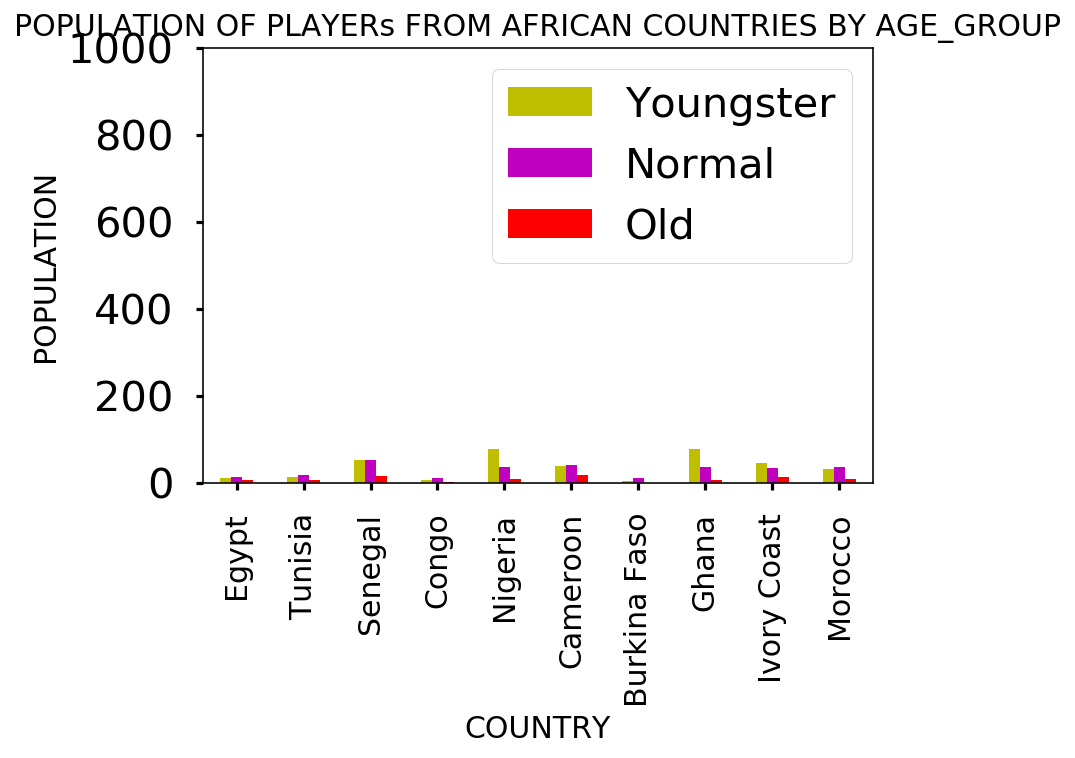

In [57]:
x_labels =afr
# plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))

ax=afrTable.plot.bar(color=list('ymr'))
plt.figure(figsize=(12, 8))
# ax.set_yticklabels(fontsize=15)

ax.set_title("POPULATION OF PLAYERs FROM AFRICAN COUNTRIES BY AGE_GROUP", fontsize=15)
ax.set_xlabel("COUNTRY", fontsize=15)
ax.set_ylabel("POPULATION", fontsize=15)
ax.set_xticklabels(x_labels, fontsize=15)
ax.set_ylim([0, 1000])

## Europe

In [58]:
eur = ['Germany', 'Portugal','Belgium','Poland','Switzerland','France','Spain','Wales','England','Italy']
eurTable = table.loc[eur]
save_subgroup(eurTable,'Nationality','eurTable')
eurTable

Test-passed: we recover the equivalent subgroup dataframe.


,Youngster,Normal,Old
Nationality,,,
Germany,356.0,263.0,69.0
Portugal,159.0,141.0,55.0
Belgium,151.0,89.0,25.0
Poland,138.0,124.0,66.0
Switzerland,111.0,74.0,25.0
France,486.0,336.0,151.0
Spain,430.0,357.0,177.0
Wales,62.0,42.0,18.0
England,917.0,491.0,194.0


(0, 1000)

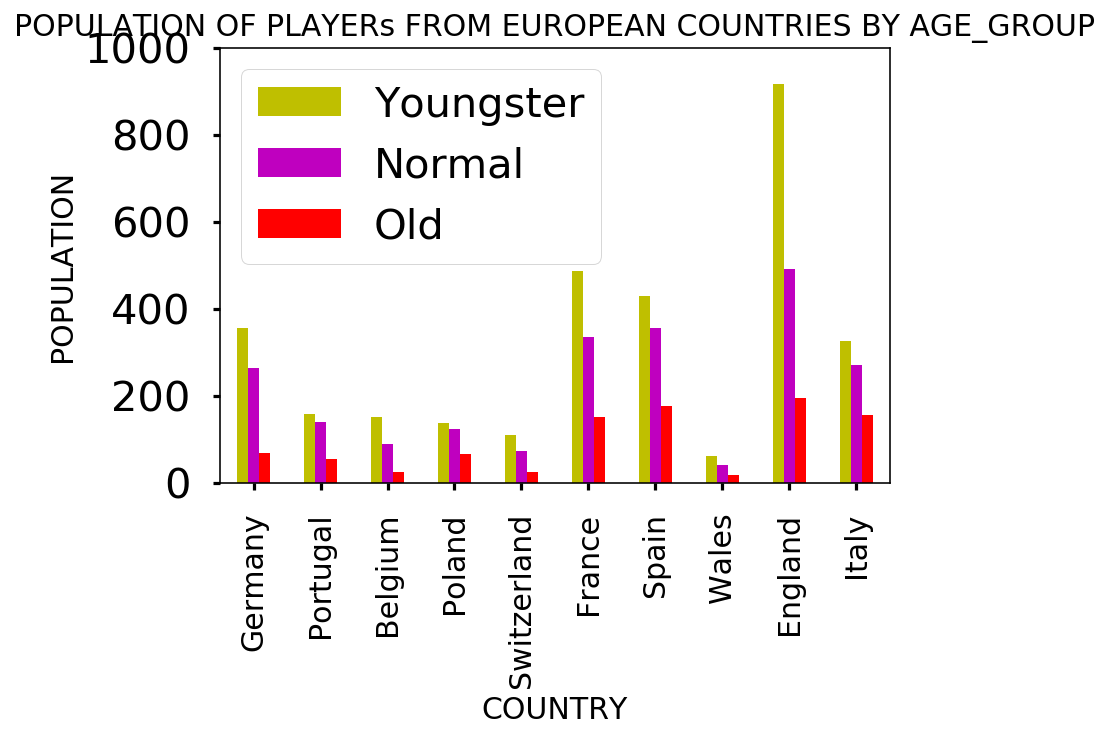

In [59]:
x_labels =eur
# plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))

ax=eurTable.plot.bar(color=list('ymr'))
plt.figure(figsize=(12, 8))
# ax.set_yticklabels(fontsize=15)

ax.set_title("POPULATION OF PLAYERs FROM EUROPEAN COUNTRIES BY AGE_GROUP", fontsize=15)
ax.set_xlabel("COUNTRY", fontsize=15)
ax.set_ylabel("POPULATION", fontsize=15)
ax.set_xticklabels(x_labels, fontsize=15)
ax.set_ylim([0, 1000])

## S.America

In [60]:
sA = ['Brazil','Argentina', 'Chile', 'Colombia','Peru', 'Uruguay','Ecuador','Paraguay','Bolivia','Venezuela']
sATable = table.loc[sA]
save_subgroup(sATable,'Nationality','sATable')
sATable

Test-passed: we recover the equivalent subgroup dataframe.


,Youngster,Normal,Old
Nationality,,,
Brazil,141.0,510.0,224.0
Argentina,446.0,416.0,228.0
Chile,207.0,121.0,68.0
Colombia,299.0,207.0,79.0
Peru,13.0,15.0,6.0
Uruguay,52.0,73.0,28.0
Ecuador,9.0,18.0,7.0
Paraguay,26.0,33.0,16.0
Bolivia,8.0,13.0,9.0


(0, 1000)

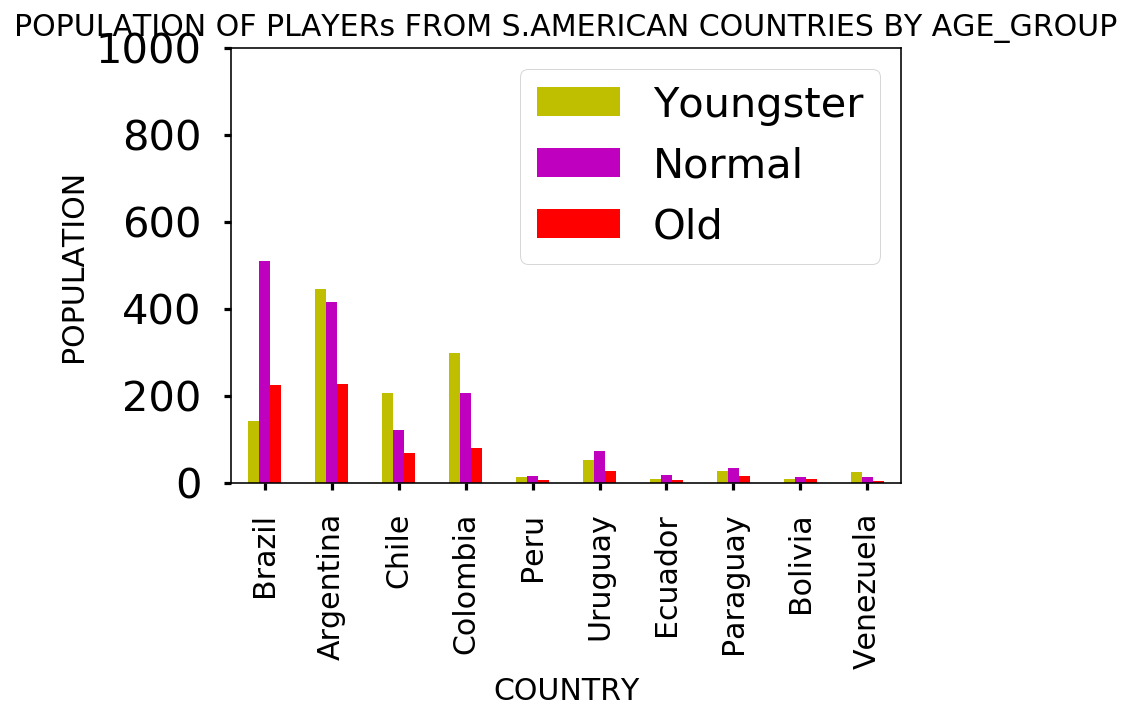

In [61]:
x_labels =sA
# plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))

ax=sATable.plot.bar(color=list('ymr'))
plt.figure(figsize=(12, 8))
# ax.set_yticklabels(fontsize=15)

ax.set_title("POPULATION OF PLAYERs FROM S.AMERICAN COUNTRIES BY AGE_GROUP", fontsize=15)
ax.set_xlabel("COUNTRY", fontsize=15)
ax.set_ylabel("POPULATION", fontsize=15)
ax.set_xticklabels(x_labels, fontsize=15)
ax.set_ylim([0, 1000])

## N.America

In [62]:
nA = ['Mexico','Costa Rica', 'United States', 'Haiti', 'Panama', 'Jamaica', 'Honduras', 'Curacao','Canada', 'El Salvador']
nATable = table.loc[nA]
save_subgroup(nATable,'Nationality','nATable')
nATable

Test-passed: we recover the equivalent subgroup dataframe.


,Youngster,Normal,Old
Nationality,,,
Mexico,159.0,123.0,56.0
Costa Rica,10.0,16.0,4.0
United States,160.0,134.0,38.0
Haiti,6.0,5.0,1.0
Panama,3.0,5.0,3.0
Jamaica,8.0,16.0,12.0
Honduras,7.0,5.0,4.0
Curacao,3.0,8.0,NaN
Canada,34.0,18.0,7.0


(0, 1000)

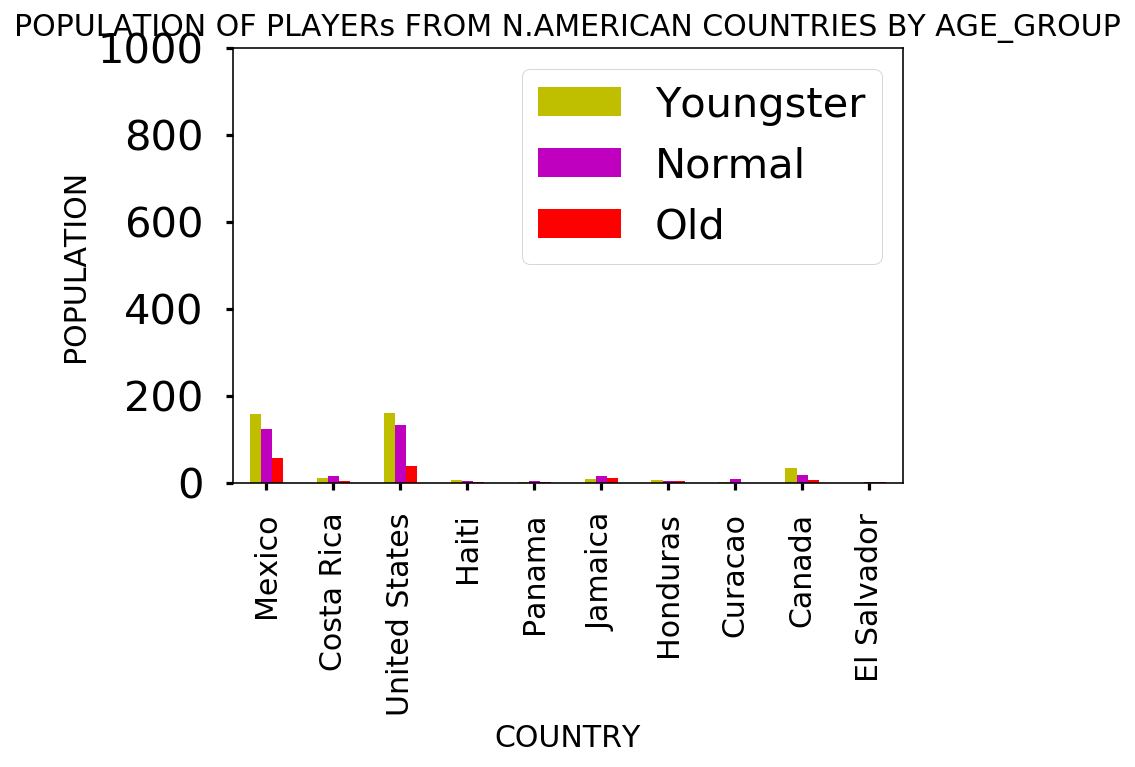

In [63]:
x_labels =nA
# plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))

ax=nATable.plot.bar(color=list('ymr'))
plt.figure(figsize=(12, 8))
# ax.set_yticklabels(fontsize=15)

ax.set_title("POPULATION OF PLAYERs FROM N.AMERICAN COUNTRIES BY AGE_GROUP", fontsize=15)
ax.set_xlabel("COUNTRY", fontsize=15)
ax.set_ylabel("POPULATION", fontsize=15)
ax.set_xticklabels(x_labels, fontsize=15)
ax.set_ylim([0, 1000])

## Asia

In [64]:
As = ['Iran','Japan','Australia','Korea Republic','Saudi Arabia',
      'China PR','Uzbekistan','New Zealand','Syria','Qatar']
AsTable = table.loc[As]
save_subgroup(AsTable,'Nationality','AsTable')
AsTable

Test-passed: we recover the equivalent subgroup dataframe.


,Youngster,Normal,Old
Nationality,,,
Iran,6.0,5.0,NaN
Japan,183.0,193.0,95.0
Australia,134.0,69.0,31.0
Korea Republic,126.0,145.0,46.0
Saudi Arabia,155.0,161.0,38.0
China PR,9.0,20.0,1.0
Uzbekistan,NaN,3.0,NaN
New Zealand,19.0,8.0,3.0
Syria,3.0,1.0,1.0


In [ ]:
x_labels =As
# plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))

ax=AsTable.plot.bar(color=list('ymr'))
plt.figure(figsize=(12, 8))
# ax.set_yticklabels(fontsize=15)

ax.set_title("POPULATION OF PLAYERs FROM ASIAN COUNTRIES BY AGE_GROUP", fontsize=15)
ax.set_xlabel("COUNTRY", fontsize=15)
ax.set_ylabel("POPULATION", fontsize=15)
ax.set_xticklabels(x_labels, fontsize=15)
ax.set_ylim([0, 1000])

(0, 1000)

## Oceania

In [ ]:
# oC = [, 'New Calendonia', 'Tahiti','Solomon Islands', 'Papua New Guinea','Fiji']
# oCTable = table.loc[oC]
# oCTable

In [ ]:
# # Setting the positions and width for the bars
# pos = list(range(len(ur_table['Nationality']))) 
# width = 0.25

# # Plotting the bars
# fig, ax = plt.subplots(figsize=(20,15))
# # Create a bar with pre_score data,
# # in position pos,
# plt.bar(pos, 
#         #using df['pre_score'] data,
#         ur_table['Youngster'], 
#         # of width
#         width, 
#         # with alpha 0.5
#         alpha=1, 
#         # with color
#         color='#EE3224', 
#         # with label the first value in first_name
#         label=ur_table['Nationality'][0]) 
# # Create a bar with mid_score data,
# # in position pos + some width buffer,
# plt.bar([p + width for p in pos], 
#         #using df['mid_score'] data,
#         ur_table['Normal'],
#         # of width
#         width, 
#         # with alpha 0.5
#         alpha=0.5, 
#         # with color
#         color='#F78F1E', 
#         # with label the second value in first_name
#         label=ur_table['Nationality'][1]) 

# # Create a bar with post_score data,
# # in position pos + some width buffer,
# plt.bar([p + width*2 for p in pos], 
#         #using df['post_score'] data,
#         ur_table['Old'], 
#         # of width
#         width, 
#         # with alpha 0.5
#         alpha=0.5, 
#         # with color
#         color='#FFC222', 
#         # with label the third value in first_name
#         label=ur_table['Nationality'][2]) 

# # Set the y axis label
# ax.set_ylabel('POPULATION')
# ax.set_ylabel('COUNTRY')

# # Set the chart's title
# ax.set_title('POPULATION OF PLAYER FROM EACH COUNTRIES BY AGE_GROUP')

# # Set the position of the x ticks
# ax.set_xticks([p + 500 * width for p in pos])

# # Set the labels for the x ticks
# ax.set_xticklabels(ur_table['Nationality'])

# # Setting the x-axis and y-axis limits
# high = []
# a = max(ur_table['Youngster'])
# high.append(a)
# b = max(ur_table['Normal'])
# high.append(b)
# c= max(ur_table['Old'])
# high.append(c)

# high.append(a)
# High = max(high)
# plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, High+ 10] )

# # Adding the legend and showing the plot
# plt.legend(['Youngster', 'Normal', 'Old'], loc='upper left')
# plt.grid()
# plt.show()

In [27]:
# ur_table.iplot(kind='bar', filename='cufflinks/grouped-bar-chart')

In [147]:
# uy=ur_table['Nationality'].unique().tolist()
# uy

In [148]:
# x_labels =['Afghanistan', 'Albania', 'Algeria', 'Angola']
# # plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))

# ax=ur_table.drop('Age_Group_Count', axis=1).plot.bar(color=list('ymr'))
# plt.figure(figsize=(12, 8))
# # ax.set_yticklabels(fontsize=15)

# ax.set_title("POPULATION OF PLAYERs FROM EACH COUNTRY BY AGE_GROUP", fontsize=15)
# ax.set_xlabel("COUNTRY", fontsize=15)
# ax.set_ylabel("POPULATION", fontsize=15)
# ax.set_xticklabels(x_labels, fontsize=15)

In [104]:

# x = [1,2,3,4,5]
# y = [1000, 1002, 1001, 1003, 1005]
# low = min(y)
# high = max(y)
# plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
# plt.bar(x,y) 
# plt.show()